# Imports


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [ ]:
print(os.getcwd())
print(os.listdir('.'))

## Download the Datasets

In [ ]:
# Uncomment what you need - Only do this one time and be sure to recomment it after running

# !wget https://challenge.ey.com/api/v1/storage/admin-files/Post_Event_San_Juan.tif -O ../Datasets/Post_Event_San_Juan.tif
# !wget https://challenge.ey.com/api/v1/storage/admin-files/Pre_Event_San_Juan.tif -O ../Datasets/Pre_Event_San_Juan.tif
# !wget https://challenge.ey.com/api/v1/storage/admin-files/027282564879278492-65c1f5242482662856c6d3ee-Buildins%20Footprint%20ROI.zip -O ../Datasets/Building_Footprint_ROI.zip

In [ ]:
# Use this to extract the building footprint dataset

zip_path = '../Datasets/Building_Footprint_ROI.zip'
extract_path = '../Datasets/Building_Footprint_ROI'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
pre_event_image = '../Datasets/Pre_Event_San_Juan.tif'
post_event_image = '../Datasets/Post_Event_San_Juan.tif'
footprint_data = '../'


## Load the Footprint Data

In [ ]:
#!pip install PyShp

Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon


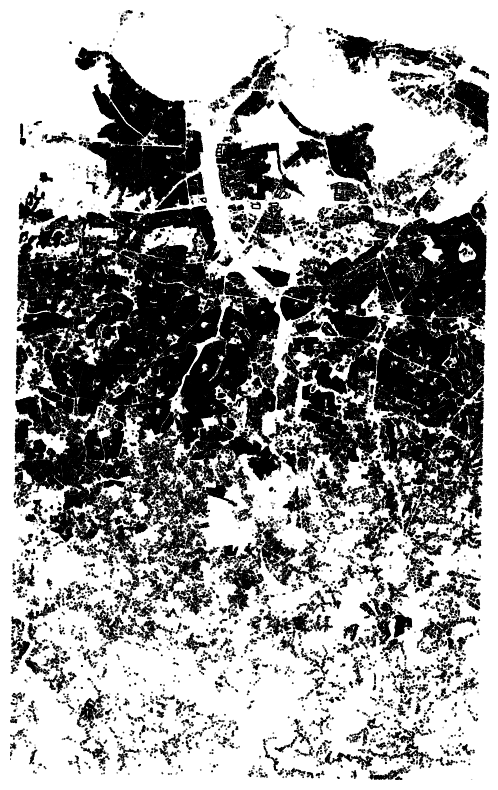

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile  # This is part of the PyShp package

def plot_shapefile(shapefile_path):
    # Read the shapefile
    with shapefile.Reader(shapefile_path) as shp:
        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Iterate through the shapes and records in the shapefile
        for shape in shp.shapes():
            # Make sure we're dealing with polygons
            if shape.shapeType == shapefile.POLYGON:
                # Extract the points from the shape
                points = shape.points
                indices = shape.parts
                indices.append(len(points))  # Ensures the last shape is processed
                for i in range(len(indices) - 1):
                    polygon_points = points[indices[i]:indices[i + 1]]
                    # Create a polygon patch and add it to the axis
                    poly = Polygon(polygon_points, closed=True, edgecolor='black', facecolor='none')
                    ax.add_patch(poly)
        
        # Set the x and y axis limits to the bounds of the shapefile
        bounds = shp.bbox
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Set axis aspect to equal for correct scaling
        ax.set_aspect('equal')
        
        # Remove axis for clean look
        ax.axis('off')
        
        # Show the plot
        plt.show()

# Replace 'path_to_your_shapefile.shp' with the path to your actual shapefile
plot_shapefile(building_footprint)


## Load the Datasets

In [9]:
post_event_image = '../Datasets/Post_Event_San_Juan.tif'
pre_event_image = '../Datasets/Pre_Event_San_Juan.tif'
building_footprint = '../Datasets/Building_Footprint_ROI/Buildins Footprint ROI/building_footprint_roi_challenge.shp'
output_dir = "../Post_Event_Grids_In_TIFF"
footprint_data_output = "../Footprint_Data"

## Start Tiling

In [7]:
#!pip install shapely

  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/45/1c/bf88b078e6e148ecb4d8e334ab94e01df383ead09d17e6c60fb90b7bbc01/shapely-2.0.3-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.4 MB 7.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00


In [15]:
tile_writer = shapefile.Writer(shapeType=shapefile.POLYGON)


Exception: Either the target filepath, or any of shp, shx, or dbf must be set to create a shapefile.

In [16]:
import os
import shapefile
from shapely.geometry import shape, box, mapping

def generate_vector_tiles(input_shp, output_dir, grid_x, grid_y):
    # Read the shapefile
    with shapefile.Reader(input_shp) as shp:
        # Create output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        # Get the bounding box of the shapefile
        min_x, min_y, max_x, max_y = shp.bbox
        
        # Calculate number of tiles in each dimension
        num_tiles_x = int((max_x - min_x) / grid_x) + 1
        num_tiles_y = int((max_y - min_y) / grid_y) + 1
        
        print(f"Total number of tiles: {num_tiles_x * num_tiles_y}")
        
        # Iterate over each tile
        for i in range(num_tiles_x):
            for j in range(num_tiles_y):
                tile_left = min_x + i * grid_x
                tile_bottom = min_y + j * grid_y
                tile_right = tile_left + grid_x
                tile_top = tile_bottom + grid_y
                
                # Create a rectangular polygon for the tile
                tile_box = box(tile_left, tile_bottom, tile_right, tile_top)
                
                # Initialize the list to collect records and shapes
                records = []
                shapes = []
                
                # Iterate over each shape record in the shapefile
                for shapeRec in shp.iterShapeRecords():
                    feature = shape(shapeRec.shape.__geo_interface__)
                    if feature.intersects(tile_box):
                        # If there is an intersection, add the geometry and record to lists
                        records.append(shapeRec.record)
                        shapes.append(feature.intersection(tile_box))
                
                # If any intersections were found, create a tile
                if shapes:
                    # Define the output file path without an extension
                    output_file = os.path.join(output_dir, f"tile_{i}_{j}")
                    
                    # Create a new shapefile writer instance with the specified file path
                    with shapefile.Writer(output_file, shapeType=shp.shapeType) as writer:
                        # Copy over the fields from the input shapefile
                        writer.fields = shp.fields[1:]  # skip first deletion flag field
                        
                        # Write records and shapes to the tile shapefile
                        for rec, geom in zip(records, shapes):
                            writer.record(*rec)
                            writer.shape(mapping(geom))
                
        print("Vector tiles generation completed.")


In [17]:
# Example usage:
generate_vector_tiles(building_footprint, footprint_data_output , grid_x=512, grid_y=512)

Total number of tiles: 1410


KeyboardInterrupt: 